In [2]:
!git clone https://github.com/facebookresearch/segment-anything-2.git


Cloning into 'segment-anything-2'...


In [2]:
%cd segment-anything-2

C:\Users\supha\Documents\65011048\segment-anything-2


C:\Users\supha\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!pip install -e .

Obtaining file:///C:/Users/supha/Documents/65011048/segment-anything-2
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for SAM-2 (pyproject.toml): started
  Building editable for SAM-2 (pyproject.toml): finished with status 'done'
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-py3-none-any.whl size=12403 sha256=db8856b1d1ee52d75d0a5b8b6fa35eff4e202116b36b7b73d1046b90bd80fe5e
  Stored in directory: C:\Users\supha\AppData\Local\Temp\pip-ephem-wheel-cache-ps7orc21\wheels

In [1]:
import cv2
import os
import requests
import numpy as np
from matplotlib import pyplot as plt
from io import BytesIO
from PIL import Image


In [2]:
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

In [12]:
checkpoint = r"C:\Users\supha\Documents\65011048\segment-anything-2\checkpoints\sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"
predictor = SAM2ImagePredictor(build_sam2(model_cfg, checkpoint, device="cpu"))


In [13]:
# โหลดภาพนิ่งจาก URL
image_url = ""
if image_url != "":
    print(f"กำลังโหลดภาพจาก URL: {image_url}")
    try:
        response = requests.get(image_url)
        img_pil = Image.open(BytesIO(response.content))  # ใช้ PIL โหลดภาพ
        image = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)  # แปลงเป็นฟอร์แมตที่ใช้กับ cv2
        print("โหลดภาพสำเร็จ")
    except Exception as e:
        print(f"ไม่สามารถโหลดภาพจาก URL ได้: {e}")
#         exit()
    
else:
    # โหลดภาพนิ่งจากเครื่อง
    image_path = r"C:\Users\supha\Documents\65011048\test-image\IMG_1089_022.jpg"  # ระบุเส้นทางของภาพในเครื่อง
    print(f"กำลังโหลดภาพจากเส้นทาง: {image_path}")
    try:
        image = cv2.imread(image_path)  # ใช้ cv2.imread() เพื่อโหลดภาพ
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        if image is None:
            raise Exception("ไม่สามารถโหลดภาพได้")  # กรณีที่ไม่สามารถโหลดภาพได้
        print("โหลดภาพจากเครื่องสำเร็จ")
    except Exception as e:
        print(f"ไม่สามารถโหลดภาพได้: {e}")
#         exit()

กำลังโหลดภาพจากเส้นทาง: C:\Users\supha\Documents\65011048\test-image\IMG_1089_022.jpg
โหลดภาพจากเครื่องสำเร็จ


In [14]:
# ฟังก์ชันสำหรับการแสดงผลภาพใน Jupyter Notebook
def show_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

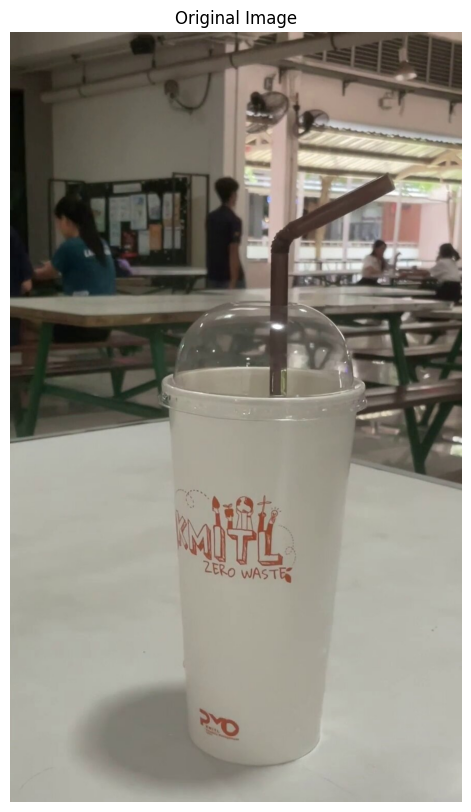

In [15]:
# แสดงภาพต้นฉบับใน Jupyter Notebook
show_image(image, title="Original Image")

In [16]:

predictor.set_image(image)
# เรียก predict() และเก็บค่า masks, scores, และ logits
masks, scores, logits = predictor.predict("segment a cup")


AssertionError: point_labels must be supplied if point_coords is supplied.

In [9]:
print(masks)

[{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]]), 'area': 415572, 'bbox': [0.0, 754.0, 877.0, 741.0], 'predicted_iou': 0.9946999549865723, 'point_coords': [[13.71875, 1425.875]], 'stability_score': 0.9849998354911804, 'crop_box': [0.0, 0.0, 878.0, 1496.0]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 267579, 'bbox': [295.0, 527.0, 393.0, 897.0], 'pr

In [10]:
# นำ mask มาซ้อนทับกับภาพต้นฉบับเพื่อแสดงผล
print("กำลังนำ mask มาซ้อนทับกับภาพต้นฉบับ...")
for i, mask in enumerate(masks):
    mask_cap = mask['segmentation']
    overlay = image.copy()
    overlay[mask_cap] = [0, 255, 0]  # เปลี่ยนสีส่วนที่เป็น mask เป็นสีเขียว
print("ซ้อนทับ mask ลงบนภาพสำเร็จ")

กำลังนำ mask มาซ้อนทับกับภาพต้นฉบับ...
ซ้อนทับ mask ลงบนภาพสำเร็จ


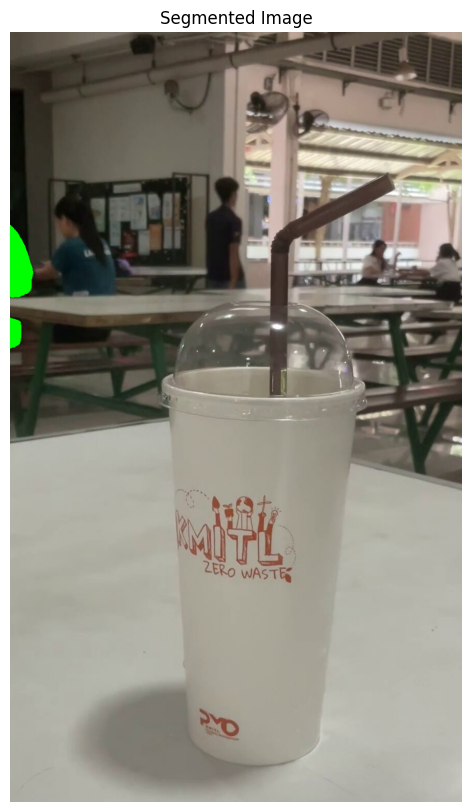

In [11]:
# แสดงผลภาพที่ถูกทำ segmentation ใน Jupyter Notebook
show_image(overlay, title="Segmented Image")